In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_combined =  pd.merge(df_trial, df_mouse, on =["Mouse ID","Mouse ID"], how = 'left')

# Display the data table for preview
df_combined.head()



Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0     b128          0                45.0                 0  Capomulin
1     f932          0                45.0                 0   Ketapril
2     g107          0                45.0                 0   Ketapril
3     a457          0                45.0                 0   Ketapril
4     c819          0                45.0                 0   Ketapril

## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
df_tumor_avg = df_combined.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"mean"})

# Convert to DataFrame
df_tumor_avg.head()

# Preview DataFrame


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
df_tumor_sem = df_combined.groupby(["Drug","Timepoint"]).agg({"Tumor Volume (mm3)":"sem"})

# Convert to DataFrame
df_tumor_sem.head()

# Preview DataFrame

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
df_tumor_avg_piv = df_tumor_avg.unstack("Drug")
df_tumor_sem_piv = df_tumor_sem.unstack("Drug")

df_tumor_avg_piv.columns = df_tumor_avg_piv.columns.droplevel(0)
df_tumor_sem_piv.columns = df_tumor_sem_piv.columns.droplevel(0)

# Preview that Reformatting worked
df_tumor_avg_piv.head()
# df_tumor_sem_piv.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

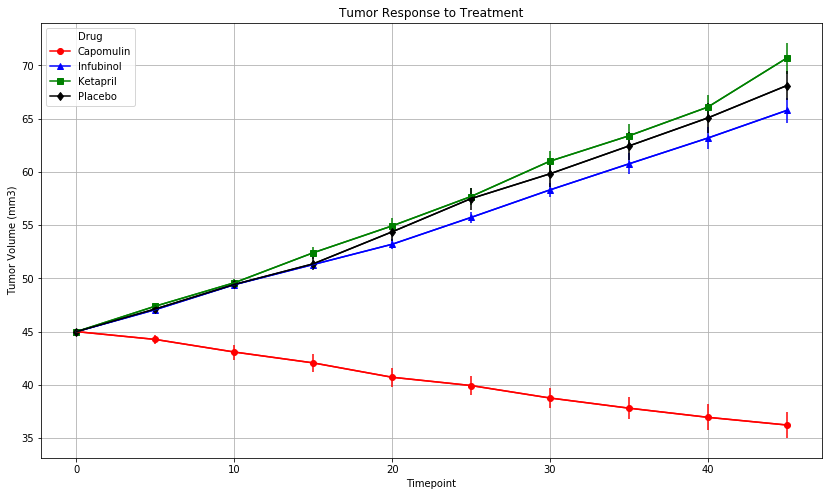

In [6]:
# Generate the Plot (with Error Bars)
selectedDrugs=["Capomulin","Infubinol","Ketapril","Placebo"]
selectedColors = ['r','b','g','k']
selectedMarkers = ["ro-","b^-","gs-","kd-"] 

ax = df_tumor_avg_piv[selectedDrugs].plot(kind="line", figsize=[14,8],yerr=df_tumor_sem_piv,color = selectedColors, legend = False )
ax.set_xlabel('Time (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor Response to Treatment')

ax.set_prop_cycle(None)
df_tumor_avg_piv[selectedDrugs].plot(style=selectedMarkers,grid=True, ax = ax)

# Save the Figure
plt.savefig("F1.Tumor Response to Treatment.png")

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
df_met_avg = df_combined.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":"mean"})

# Convert to DataFrame

# Preview DataFrame
df_met_avg.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
df_met_sem = df_combined.groupby(["Drug","Timepoint"]).agg({"Metastatic Sites":"sem"})

# Convert to DataFrame

# Preview DataFrame
df_met_sem.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
df_met_avg_piv = df_met_avg.unstack("Drug")
df_met_sem_piv = df_met_sem.unstack("Drug")

df_met_avg_piv.columns = df_met_avg_piv.columns.droplevel(0)

# Preview that Reformatting worked
df_met_avg_piv.head()


Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118

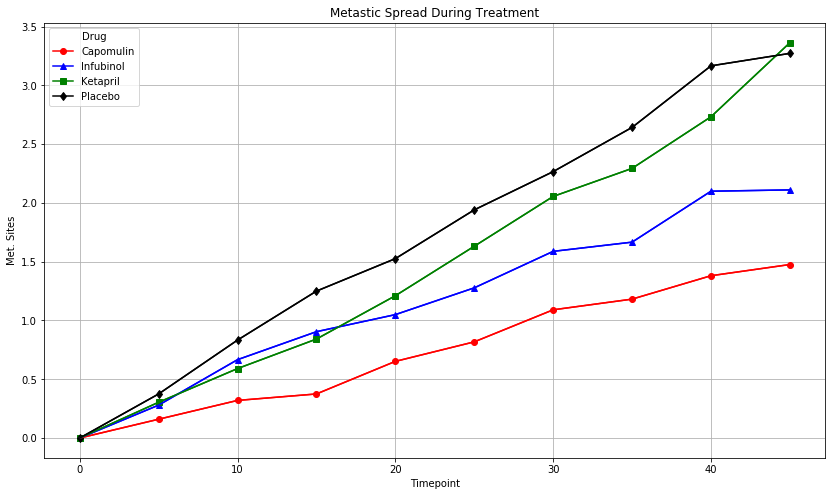

In [11]:
# Generate the Plot (with Error Bars)
ax2 = df_met_avg_piv[selectedDrugs].plot(kind="line", figsize=[14,8],yerr=df_met_sem_piv,color = selectedColors, legend = False )
ax2.set_xlabel('Treatment Duration (days)')
ax2.set_ylabel('Met. Sites')
ax2.set_title('Metastic Spread During Treatment')
ax2.set_prop_cycle(None)

df_met_avg_piv[selectedDrugs].plot(style=selectedMarkers,grid=True, ax = ax2)


# Save the Figure
plt.savefig("F2.Metastic Spread During Treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
df_mice_count = df_combined.groupby(["Drug","Timepoint"]).agg({"Mouse ID":"count"})

# Convert to DataFrame

# Preview DataFrame
df_mice_count.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
df_mice_count_piv = df_mice_count.unstack("Drug")
df_mice_count_piv.columns = df_mice_count_piv.columns.droplevel(0)
df_mice_count_piv.head()

# Preview the Data Frame


Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

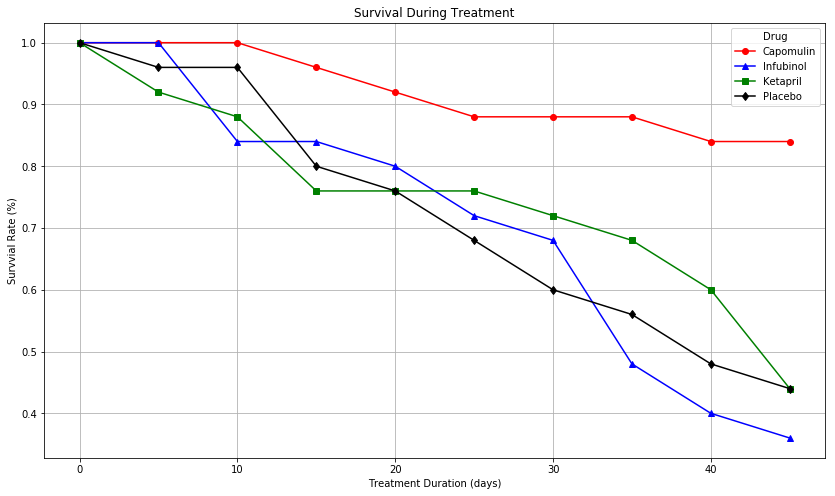

In [15]:
# Generate the Plot (Accounting for percentages)
df_mice_piv_pct = df_mice_count_piv/df_mice_count_piv[selectedDrugs].iloc[0]
af3 = df_mice_piv_pct[selectedDrugs].plot(figsize=[14,8],grid=True, colormap='jet' ,style=selectedMarkers)

af3.set_xlabel('Treatment Duration (days)')
af3.set_ylabel('Survvial Rate (%)')
af3.set_title('Survival During Treatment')

# Save the Figure
plt.savefig("F3.Survival During Treatment.png")
# Show the Figure
plt.show()

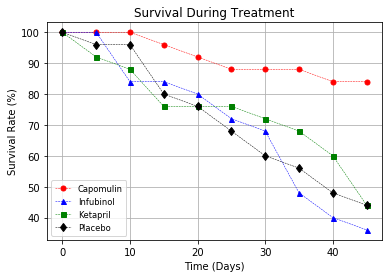

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug
pct =(df_tumor_avg_piv.iloc[-1]-df_tumor_avg_piv.iloc[0])*100/df_tumor_avg_piv.iloc[0]

# Display the data to confirm
pct


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

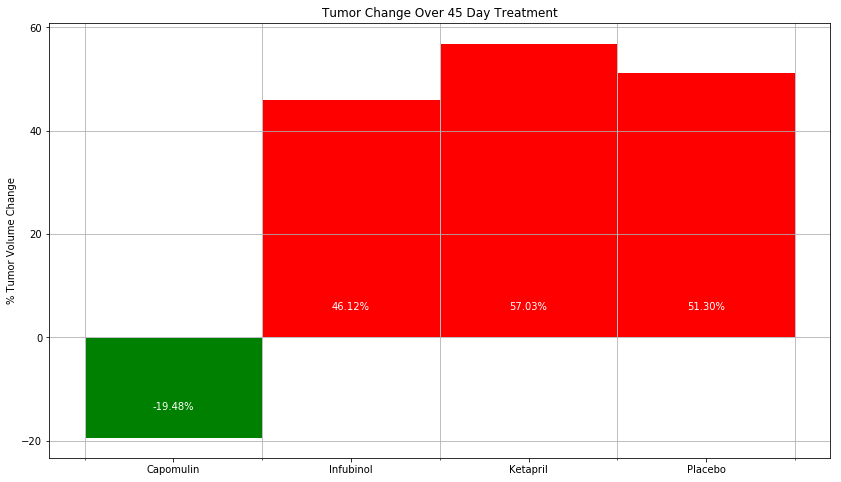

In [25]:
# Store all Relevant Percent Changes into a Tuple
percent = pd.DataFrame({"Drug":pct.loc[selectedDrugs].index,"Percent":pct.loc[selectedDrugs].values})
percent["Positive"] = ""
percent["Negative"] = ""


# Splice the data between passing and failing drugs
for index, row in percent.iterrows():
    if row["Percent"] < 0:
        percent["Negative"].iloc[index] = percent["Percent"].iloc[index]
        percent["Positive"].iloc[index]= 0
    else:
        percent["Negative"].iloc[index] = 0
        percent["Positive"].iloc[index] =percent["Percent"].iloc[index]
percent.head()

negative_data = percent["Negative"]
positive_data = percent["Positive"]

fig4 = plt.figure()
ax4 = plt.subplot(1,1,1)
ax4.bar(percent["Drug"], negative_data, width=1, color='g',edgecolor="w")
ax4.bar(percent["Drug"], positive_data, width=1, color='r',edgecolor="w")

# Orient widths. Add labels, tick marks, etc. 
ax4.set_yticks(np.arange(-20,80,step=20))
ax4.set_xticks(np.arange(-.5,len(selectedDrugs),step=1), minor =True)
ax4.grid(axis = "x",which="minor")
ax4.grid(axis = "y",which="major")
ax4.set_title("Tumor Change Over 45 Day Treatment")
ax4.set_ylabel("% Tumor Volume Change")
fig4.set_size_inches(14,8)


# Use functions to label the percentages of changes
labels = ["%.2f%%" % percent["Percent"].iloc[i] for i in range(len(selectedDrugs))]


# Call functions to implement the function calls
rects = ax4.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax4.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom',color="white")


# Save the Figure
fig4.savefig("F4.Tumor Change Over 45 Day Treatment.png")

# Show the Figure
fig4.show()

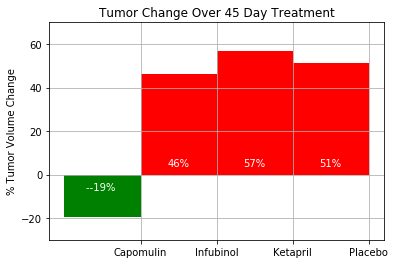